# Alcaldía de Bucaramanga

## Description

#### 0. Libraries

We load the libraries to use.

In [180]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter

%matplotlib inline 
sns.set(color_codes=True)

#### 1. Load Datasets

For this exercise we have the following datasets:
* Anonymous SISBEN for 2021
* Anonymous SISBEN for 2022
* Census of street dwellers
* Dictionary used for the census

In [181]:
sb2021 = pd.read_csv('SISBEN_2021.csv', delimiter='~', encoding='latin1')
sb2022 = pd.read_csv('SISBEN_2022.csv', delimiter='~', encoding='latin1')
chc = pd.read_csv('CHC.csv', delimiter='~', encoding='latin1')
d_chc = pd.read_csv('diccionario_CHC.csv', delimiter='~', encoding='latin1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,5,7,9,10,37,41,42,47,48,49,52,54,55,73,75,80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (246,247) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


We received an error related to file upload. Python cannot define the data type for all columns.

#### 1.1 Sisben 2021 Exploration

We explored the first five records.

In [182]:
sb2021.head()

,ID_data,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,pri_nombre,seg_nombre,pri_apellido,seg_apellido,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia
0,1,sisben iv 14188777,NaN,NaN,NaN,NaN,NaN,NaN,68001093549300001017,1,NaN,4.0,2019-09-10 11:18:02,pri_nombre,seg_nombre,pri_apellido,seg_apellido,5,1,2,2013-12-27 00:00:00,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,NaN,"63,24",6.0,9.0,9.0,99.0,ninguna,"7,10628748","-73,13936591",kr 4 oeste # 43 - 18 in 1,145.0,campo hermoso,0.0,sin vereda,3022550240,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"3,75",0.0,NaN,NaN,NaN,680010935493000010171,0.0,680010935493000010171,1056714.0
1,1,sisben iv 14028290,NaN,NaN,NaN,NaN,NaN,NaN,68001065548600002007,1,NaN,14.0,2019-10-03 10:03:35,pri_nombre,seg_nombre,pri_apellido,seg_apellido,5,2,2,2014-08-20 00:00:00,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"38,18",5.0,9.0,9.0,99.0,ninguna,"7,13187059","-73,09989155",kr 61 # 16 - 13 pi 3,114.0,buenos aires,0.0,sin vereda,3166780089,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,NaN,NaN,NaN,680010655486000020071,0.0,680010655486000020071,1043841.0
2,1,sisben iv 14205420,NaN,NaN,NaN,NaN,NaN,NaN,68001047548200001063,2,NaN,1.0,2019-09-09 11:04:10,pri_nombre,seg_nombre,pri_apellido,seg_apellido,1,3,1,1929-10-15 00:00:00,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,contributivo,cotizante,"45,08",90.0,3.0,0.0,99.0,ninguna,"7,10397017","-73,14146073",kr 9 b oeste # 44 - 19,145.0,campo hermoso,0.0,sin vereda,6961948,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4,5",0.0,NaN,NaN,NaN,680010475482000010632,0.0,680010475482000010632,1031856.0
3,1,sisben iv 14047259,NaN,NaN,NaN,NaN,NaN,NaN,68001001547500000397,1,NaN,1.0,2019-08-26 08:21:44,pri_nombre,seg_nombre,pri_apellido,seg_apellido,1,4,1,1930-02-24 00:00:00,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,contributivo,cotizante,"62,04",90.0,3.0,6.0,99.0,mas de una,"7,09810543","-73,11369419",kr 21 # 70 - 15,193.0,nueva granada,0.0,sin vereda,6474573,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,NaN,NaN,NaN,680010015475000003971,0.0,680010015475000003971,1000217.0
4,1,sisben iv 14131664,NaN,NaN,NaN,NaN,NaN,NaN,68001026548300001183,2,NaN,1.0,2019-09-12 09:13:02,pri_nombre,seg_nombre,pri_apellido,seg_apellido,1,5,1,1931-09-09 00:00:00,3.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,subsidiado,cabeza de familia,"21,9",88.0,2.0,1.0,5.0,mas de una,"7,11287649","-73,1316689",kr 7 # 43 - 56,142.0,alfonso lopez,0.0,sin vereda,6335390,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,NaN,NaN,NaN,680010265483000011832,0.0,680010265483000011832,1016672.0


We explored the final five records.

In [183]:
sb2021.tail()

,ID_data,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,pri_nombre,seg_nombre,pri_apellido,seg_apellido,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia
357443,3,sisben iii 012020,68001.0,bucaramanga,68.0,santander,51262577.0,508|0,68|001|508|1,680015081,NaN,NaN,10/22/2019 0:00,pri_nombre,seg_nombre,pri_apellido,seg_apellido,4,357444,2,2003-01-05 00:00:00,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,finca la torre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680015081,NaN,NaN,NaN
357444,3,sisben iii 012020,68001.0,bucaramanga,68.0,santander,51513743.0,16769|0,68|001|16769|1,68001167691,NaN,NaN,2011-08-03 00:00:00,pri_nombre,seg_nombre,pri_apellido,seg_apellido,4,357445,1,2003-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cas 175 plan vcp pi 2 dg 16 17 46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68001167691,NaN,NaN,NaN
357445,3,sisben iii 012020,68001.0,bucaramanga,68.0,santander,51520049.0,54069|0,68|001|54069|1,68001540691,NaN,NaN,3/28/2011 0:00,pri_nombre,seg_nombre,pri_apellido,seg_apellido,4,357446,2,2003-12-08 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca 174 in 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68001540691,NaN,NaN,NaN
357446,3,victimas,68001.0,bucaramanga,68.0,santander,NaN,0|0,0|0,NaN,NaN,NaN,NaN,pri_nombre,seg_nombre,pri_apellido,seg_apellido,0,357447,1,1997-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357447,3,victimas,68001.0,bucaramanga,68.0,santander,NaN,0|0,0|0,NaN,NaN,NaN,NaN,pri_nombre,seg_nombre,pri_apellido,seg_apellido,0,357448,1,7/27/2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will explore all the columns present in the dataset.

In [184]:
sb2021.columns

Index(['ID_data', 'origen', 'cod_mpio', 'nom_mpio', 'cod_dpto', 'nom_dpto',
       'id_registro', 'secuencia_reg', 'ide_ficha_origen', 'ide_origen',
       'id_hogar_s3', 'tip_parentesco', 'fecha_encuesta', 'pri_nombre',
       'seg_nombre', 'pri_apellido', 'seg_apellido', 'tip_documento',
       'num_documento_a', 'sexo_persona', 'fec_nacimiento', 'maestra_grupo',
       'nivel_sisben', 'fea_pers', 'fea_hog', 'cm_benef_pers', 'cm_benef_hog',
       'cm_priori_pers', 'cm_priori_hog', 'jea_pers', 'jea_hog',
       'iva_fea_hog_v3', 'iva_cm_v3', 'iva_cm_hog_v3', 'iva_fea_v3',
       'no_cubiertos_trans_hog', 'gen_e_per', 'gen_e_hog', 'victima_pers',
       'victima_hog', 'bdua_regimen', 'tipo_afiliado',
       'puntaje_sisben_3_trunc', 'edad_c', 'ind_fondo_pensiones_siv',
       'tip_actividad_mes_siv', 'tip_empleado_siv', 'discapacidad',
       'coord_x_auto_enc', 'coord_y_auto_enc', 'direcc', 'cod_barrio',
       'nom_barrio', 'cod_vereda', 'nom_vereda', 'tel_contacto',
       'tel_con

With the dataset loaded, we will explore the null values.

In [185]:
sb2021.isnull().sum()

ID_data                        0
origen                         0
cod_mpio                  339030
nom_mpio                  339030
cod_dpto                  339030
                           ...  
icbf_ninos_venezolanos    357325
hogar_final                13521
estado_s3                  18418
hogar_corregido            18418
familia                    18418
Length: 82, dtype: int64

We notice that there is a high number of null values in the column. Manually reviewing the dataset, we observe that these null values correspond to gaps in the SISBEN.

We decided to replace these null values within the dataset with a default value of zero that will indicate that the record did not have a value for the respondent variable in the SISBEN.

In [186]:
f_sb2021 = sb2021.fillna(0)

We will create a copy of our dataset with the replaced values.

We explored the first five records.

In [187]:
f_sb2021.head()

,ID_data,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,pri_nombre,seg_nombre,pri_apellido,seg_apellido,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia
0,1,sisben iv 14188777,0.0,0,0.0,0,0.0,0,68001093549300001017,1,0,4.0,2019-09-10 11:18:02,pri_nombre,seg_nombre,pri_apellido,seg_apellido,5,1,2,2013-12-27 00:00:00,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,"63,24",6.0,9.0,9.0,99.0,ninguna,"7,10628748","-73,13936591",kr 4 oeste # 43 - 18 in 1,145.0,campo hermoso,0.0,sin vereda,3022550240,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"3,75",0.0,0,0.0,0.0,680010935493000010171,0.0,680010935493000010171,1056714.0
1,1,sisben iv 14028290,0.0,0,0.0,0,0.0,0,68001065548600002007,1,0,14.0,2019-10-03 10:03:35,pri_nombre,seg_nombre,pri_apellido,seg_apellido,5,2,2,2014-08-20 00:00:00,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,"38,18",5.0,9.0,9.0,99.0,ninguna,"7,13187059","-73,09989155",kr 61 # 16 - 13 pi 3,114.0,buenos aires,0.0,sin vereda,3166780089,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.0,0,0.0,0.0,680010655486000020071,0.0,680010655486000020071,1043841.0
2,1,sisben iv 14205420,0.0,0,0.0,0,0.0,0,68001047548200001063,2,0,1.0,2019-09-09 11:04:10,pri_nombre,seg_nombre,pri_apellido,seg_apellido,1,3,1,1929-10-15 00:00:00,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,contributivo,cotizante,"45,08",90.0,3.0,0.0,99.0,ninguna,"7,10397017","-73,14146073",kr 9 b oeste # 44 - 19,145.0,campo hermoso,0.0,sin vereda,6961948,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"4,5",0.0,0,0.0,0.0,680010475482000010632,0.0,680010475482000010632,1031856.0
3,1,sisben iv 14047259,0.0,0,0.0,0,0.0,0,68001001547500000397,1,0,1.0,2019-08-26 08:21:44,pri_nombre,seg_nombre,pri_apellido,seg_apellido,1,4,1,1930-02-24 00:00:00,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,contributivo,cotizante,"62,04",90.0,3.0,6.0,99.0,mas de una,"7,09810543","-73,11369419",kr 21 # 70 - 15,193.0,nueva granada,0.0,sin vereda,6474573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0,0.0,0.0,680010015475000003971,0.0,680010015475000003971,1000217.0
4,1,sisben iv 14131664,0.0,0,0.0,0,0.0,0,68001026548300001183,2,0,1.0,2019-09-12 09:13:02,pri_nombre,seg_nombre,pri_apellido,seg_apellido,1,5,1,1931-09-09 00:00:00,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,subsidiado,cabeza de familia,"21,9",88.0,2.0,1.0,5.0,mas de una,"7,11287649","-73,1316689",kr 7 # 43 - 56,142.0,alfonso lopez,0.0,sin vereda,6335390,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0,0.0,0.0,680010265483000011832,0.0,680010265483000011832,1016672.0


We explored the final five records.

In [188]:
f_sb2021.tail()

,ID_data,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,pri_nombre,seg_nombre,pri_apellido,seg_apellido,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia
357443,3,sisben iii 012020,68001.0,bucaramanga,68.0,santander,51262577.0,508|0,68|001|508|1,680015081,0,0.0,10/22/2019 0:00,pri_nombre,seg_nombre,pri_apellido,seg_apellido,4,357444,2,2003-01-05 00:00:00,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,finca la torre,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,680015081,0.0,0,0.0
357444,3,sisben iii 012020,68001.0,bucaramanga,68.0,santander,51513743.0,16769|0,68|001|16769|1,68001167691,0,0.0,2011-08-03 00:00:00,pri_nombre,seg_nombre,pri_apellido,seg_apellido,4,357445,1,2003-08-04 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,cas 175 plan vcp pi 2 dg 16 17 46,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,68001167691,0.0,0,0.0
357445,3,sisben iii 012020,68001.0,bucaramanga,68.0,santander,51520049.0,54069|0,68|001|54069|1,68001540691,0,0.0,3/28/2011 0:00,pri_nombre,seg_nombre,pri_apellido,seg_apellido,4,357446,2,2003-12-08 00:00:00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,ca 174 in 2,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,68001540691,0.0,0,0.0
357446,3,victimas,68001.0,bucaramanga,68.0,santander,0.0,0|0,0|0,0,0,0.0,0,pri_nombre,seg_nombre,pri_apellido,seg_apellido,0,357447,1,1997-07-02 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0
357447,3,victimas,68001.0,bucaramanga,68.0,santander,0.0,0|0,0|0,0,0,0.0,0,pri_nombre,seg_nombre,pri_apellido,seg_apellido,0,357448,1,7/27/2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0


We will explore our null values within the dataset.

In [189]:
f_sb2021.isnull().sum()

ID_data                   0
origen                    0
cod_mpio                  0
nom_mpio                  0
cod_dpto                  0
                         ..
icbf_ninos_venezolanos    0
hogar_final               0
estado_s3                 0
hogar_corregido           0
familia                   0
Length: 82, dtype: int64

We will now explore the data types of our columns.

In [190]:
f_sb2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357448 entries, 0 to 357447
Data columns (total 82 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_data                   357448 non-null  int64  
 1   origen                    357448 non-null  object 
 2   cod_mpio                  357448 non-null  float64
 3   nom_mpio                  357448 non-null  object 
 4   cod_dpto                  357448 non-null  float64
 5   nom_dpto                  357448 non-null  object 
 6   id_registro               357448 non-null  float64
 7   secuencia_reg             357448 non-null  object 
 8   ide_ficha_origen          357448 non-null  object 
 9   ide_origen                357448 non-null  object 
 10  id_hogar_s3               357448 non-null  object 
 11  tip_parentesco            357448 non-null  float64
 12  fecha_encuesta            357448 non-null  object 
 13  pri_nombre                357448 non-null  o

Some values related to respondent information are not available and were replaced by a constant value. Since this information is not relevant to the study, it was decided to eliminate these columns.

In [191]:
f_sb2021.drop(['ID_data', 'pri_nombre', 'seg_nombre', 'pri_apellido', 'seg_apellido'], axis=1, inplace=True)

Our final columns are as follows:

In [192]:
f_sb2021.convert_dtypes().dtypes

origen                    string
cod_mpio                   Int64
nom_mpio                  object
cod_dpto                   Int64
nom_dpto                  object
                           ...  
icbf_ninos_venezolanos     Int64
hogar_final               object
estado_s3                  Int64
hogar_corregido           object
familia                    Int64
Length: 77, dtype: object

And the detail of the data type of each column is as follows:

In [193]:
f_sb2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357448 entries, 0 to 357447
Data columns (total 77 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   origen                    357448 non-null  object 
 1   cod_mpio                  357448 non-null  float64
 2   nom_mpio                  357448 non-null  object 
 3   cod_dpto                  357448 non-null  float64
 4   nom_dpto                  357448 non-null  object 
 5   id_registro               357448 non-null  float64
 6   secuencia_reg             357448 non-null  object 
 7   ide_ficha_origen          357448 non-null  object 
 8   ide_origen                357448 non-null  object 
 9   id_hogar_s3               357448 non-null  object 
 10  tip_parentesco            357448 non-null  float64
 11  fecha_encuesta            357448 non-null  object 
 12  tip_documento             357448 non-null  int64  
 13  num_documento_a           357448 non-null  i

We will try a dtypes to force python to infer on the actual data types of the dataframe.

In [194]:
f_sb2021 = f_sb2021.convert_dtypes(infer_objects=False)

And the detail of the data type of each column is as follows:

In [195]:
f_sb2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357448 entries, 0 to 357447
Data columns (total 77 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   origen                    357448 non-null  string
 1   cod_mpio                  357448 non-null  Int64 
 2   nom_mpio                  357448 non-null  object
 3   cod_dpto                  357448 non-null  Int64 
 4   nom_dpto                  357448 non-null  object
 5   id_registro               357448 non-null  Int64 
 6   secuencia_reg             357448 non-null  object
 7   ide_ficha_origen          357448 non-null  string
 8   ide_origen                357448 non-null  object
 9   id_hogar_s3               357448 non-null  object
 10  tip_parentesco            357448 non-null  Int64 
 11  fecha_encuesta            357448 non-null  object
 12  tip_documento             357448 non-null  Int64 
 13  num_documento_a           357448 non-null  Int64 
 14  sexo

The values for the coordinates are still in Object format. We will change the data type.

In [196]:
f_sb2021['coord_x_auto_enc'] = f_sb2021['coord_x_auto_enc'].str.replace(",", ".")
f_sb2021['coord_y_auto_enc'] = f_sb2021['coord_y_auto_enc'].str.replace(",", ".")

In [197]:
f_sb2021 = f_sb2021.astype({'coord_x_auto_enc':'float', 'coord_y_auto_enc':'float'})

Now, we explore our dataset.

In [198]:
f_sb2021.head()

,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia
0,sisben iv 14188777,0,0,0,0,0,0,68001093549300001017,1,0,4,2019-09-10 11:18:02,5,1,2,2013-12-27 00:00:00,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"63,24",6,9,9,99,ninguna,7.106287,-73.139366,kr 4 oeste # 43 - 18 in 1,145,campo hermoso,0,sin vereda,3022550240,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,"3,75",0,0,0,0,680010935493000010171,0,680010935493000010171,1056714
1,sisben iv 14028290,0,0,0,0,0,0,68001065548600002007,1,0,14,2019-10-03 10:03:35,5,2,2,2014-08-20 00:00:00,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"38,18",5,9,9,99,ninguna,7.131871,-73.099892,kr 61 # 16 - 13 pi 3,114,buenos aires,0,sin vereda,3166780089,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,6,1,0,0,0,680010655486000020071,0,680010655486000020071,1043841
2,sisben iv 14205420,0,0,0,0,0,0,68001047548200001063,2,0,1,2019-09-09 11:04:10,1,3,1,1929-10-15 00:00:00,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,contributivo,cotizante,"45,08",90,3,0,99,ninguna,7.103970,-73.141461,kr 9 b oeste # 44 - 19,145,campo hermoso,0,sin vereda,6961948,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,"4,5",0,0,0,0,680010475482000010632,0,680010475482000010632,1031856
3,sisben iv 14047259,0,0,0,0,0,0,68001001547500000397,1,0,1,2019-08-26 08:21:44,1,4,1,1930-02-24 00:00:00,4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,contributivo,cotizante,"62,04",90,3,6,99,mas de una,7.098105,-73.113694,kr 21 # 70 - 15,193,nueva granada,0,sin vereda,6474573,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,0,680010015475000003971,0,680010015475000003971,1000217
4,sisben iv 14131664,0,0,0,0,0,0,68001026548300001183,2,0,1,2019-09-12 09:13:02,1,5,1,1931-09-09 00:00:00,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,subsidiado,cabeza de familia,"21,9",88,2,1,5,mas de una,7.112876,-73.131669,kr 7 # 43 - 56,142,alfonso lopez,0,sin vereda,6335390,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,680010265483000011832,0,680010265483000011832,1016672


We notice that our dataset has some date columns. 

In [199]:
f_sb2021['fecha_encuesta']

0         2019-09-10 11:18:02
1         2019-10-03 10:03:35
2         2019-09-09 11:04:10
3         2019-08-26 08:21:44
4         2019-09-12 09:13:02
                 ...         
357443        10/22/2019 0:00
357444    2011-08-03 00:00:00
357445         3/28/2011 0:00
357446                      0
357447                      0
Name: fecha_encuesta, Length: 357448, dtype: object

We will convert to datetime.

In [200]:
f_sb2021['fecha_encuesta'] = pd.to_datetime(f_sb2021['fecha_encuesta'])

Now, we explore our columns:

In [201]:
f_sb2021['fecha_encuesta']

0        2019-09-10 11:18:02
1        2019-10-03 10:03:35
2        2019-09-09 11:04:10
3        2019-08-26 08:21:44
4        2019-09-12 09:13:02
                 ...        
357443   2019-10-22 00:00:00
357444   2011-08-03 00:00:00
357445   2011-03-28 00:00:00
357446   1970-01-01 00:00:00
357447   1970-01-01 00:00:00
Name: fecha_encuesta, Length: 357448, dtype: datetime64[ns]

We analyze the other column to date:

In [202]:
f_sb2021['fec_nacimiento']

0         2013-12-27 00:00:00
1         2014-08-20 00:00:00
2         1929-10-15 00:00:00
3         1930-02-24 00:00:00
4         1931-09-09 00:00:00
                 ...         
357443    2003-01-05 00:00:00
357444    2003-08-04 00:00:00
357445    2003-12-08 00:00:00
357446    1997-07-02 00:00:00
357447              7/27/2001
Name: fec_nacimiento, Length: 357448, dtype: string

Now, we convert the column date type:

In [203]:
f_sb2021['fec_nacimiento'] = pd.to_datetime(f_sb2021['fec_nacimiento'])

Now, we check out final column:

In [204]:
f_sb2021['fec_nacimiento']

0        2013-12-27
1        2014-08-20
2        1929-10-15
3        1930-02-24
4        1931-09-09
            ...    
357443   2003-01-05
357444   2003-08-04
357445   2003-12-08
357446   1997-07-02
357447   2001-07-27
Name: fec_nacimiento, Length: 357448, dtype: datetime64[ns]

We notice that some values for the column marking the type of health scheme have string and int values.

In [205]:
f_sb2021['gen_e_hog'].unique()

array([0, 1.0, '1', 'subsidiado', 'contributivo'], dtype=object)

We map the new values.

In [206]:
f_sb2021['gen_e_hog'] = f_sb2021['gen_e_hog'].map({'0'   : 0,
                                                   '1.0' : 1,
                                                   '1'   : 1,
                                                   'subsidiado': 0,
                                                   'contributivo' : 1},
                                                   na_action = None)

And fill the null values:

In [207]:
f_sb2021['gen_e_hog'] = f_sb2021['gen_e_hog'].fillna(0)

And explore the unique column values:

In [208]:
f_sb2021['gen_e_hog'].unique()

array([0., 1.])

Well, our final dataset is:

In [209]:
f_sb2021.head()

,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia
0,sisben iv 14188777,0,0,0,0,0,0,68001093549300001017,1,0,4,2019-09-10 11:18:02,5,1,2,2013-12-27,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,"63,24",6,9,9,99,ninguna,7.106287,-73.139366,kr 4 oeste # 43 - 18 in 1,145,campo hermoso,0,sin vereda,3022550240,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,"3,75",0,0,0,0,680010935493000010171,0,680010935493000010171,1056714
1,sisben iv 14028290,0,0,0,0,0,0,68001065548600002007,1,0,14,2019-10-03 10:03:35,5,2,2,2014-08-20,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,"38,18",5,9,9,99,ninguna,7.131871,-73.099892,kr 61 # 16 - 13 pi 3,114,buenos aires,0,sin vereda,3166780089,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,6,1,0,0,0,680010655486000020071,0,680010655486000020071,1043841
2,sisben iv 14205420,0,0,0,0,0,0,68001047548200001063,2,0,1,2019-09-09 11:04:10,1,3,1,1929-10-15,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"45,08",90,3,0,99,ninguna,7.103970,-73.141461,kr 9 b oeste # 44 - 19,145,campo hermoso,0,sin vereda,6961948,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,"4,5",0,0,0,0,680010475482000010632,0,680010475482000010632,1031856
3,sisben iv 14047259,0,0,0,0,0,0,68001001547500000397,1,0,1,2019-08-26 08:21:44,1,4,1,1930-02-24,4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"62,04",90,3,6,99,mas de una,7.098105,-73.113694,kr 21 # 70 - 15,193,nueva granada,0,sin vereda,6474573,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,0,680010015475000003971,0,680010015475000003971,1000217
4,sisben iv 14131664,0,0,0,0,0,0,68001026548300001183,2,0,1,2019-09-12 09:13:02,1,5,1,1931-09-09,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,subsidiado,cabeza de familia,"21,9",88,2,1,5,mas de una,7.112876,-73.131669,kr 7 # 43 - 56,142,alfonso lopez,0,sin vereda,6335390,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,680010265483000011832,0,680010265483000011832,1016672


We found some categorical values. For the purposes of the activity we will choose to use a LabelEncoding of Sklearn to guarantee the encoding of the data.

In the next installment we will evaluate if this method was adequate for the encoding process.

For bdua_regimen column we have:

In [210]:
f_sb2021['bdua_regimen'].unique()

array(['0', 'contributivo', 'subsidiado', 0, 'excepcion'], dtype=object)

Created a new column; we have to replace some '0' and 0 values.

In [211]:
f_sb2021['bdua_regimen_n'] = f_sb2021['bdua_regimen'].replace(['0', 0], ['subsidiado','subsidiado'])

Check the column values:

In [212]:
f_sb2021['bdua_regimen_n'].unique()

array(['subsidiado', 'contributivo', 'excepcion'], dtype=object)

And use a label encoder:

In [213]:
f_sb2021['bdua_regimen_lenco'] = LabelEncoder().fit_transform(f_sb2021['bdua_regimen_n'])

Drop the old column with the replaced values:

In [214]:
del f_sb2021['bdua_regimen_n']

And check the results:

In [215]:
f_sb2021['bdua_regimen_lenco'].unique()

array([2, 0, 1])

We realized the same steps for the tipo_afiliado column:

In [216]:
f_sb2021['tipo_afiliado'].unique()

array([0, 'cotizante', 'cabeza de familia', 'beneficiario', 'adicional',
       'otro miembro del nucleo familiar'], dtype=object)

In [217]:
f_sb2021['tipo_afiliado_n'] = f_sb2021['bdua_regimen'].replace([0], ['beneficiario'])

In [218]:
f_sb2021['tipo_afiliado_lenco'] = LabelEncoder().fit_transform(f_sb2021['tipo_afiliado_n'])
del f_sb2021['tipo_afiliado_n']
f_sb2021['tipo_afiliado_lenco'].unique()

array([0, 2, 4, 1, 3])

Display all the columns:

In [219]:
pd.set_option('display.max_columns', None)
f_sb2021.head()

,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia,bdua_regimen_lenco,tipo_afiliado_lenco
0,sisben iv 14188777,0,0,0,0,0,0,68001093549300001017,1,0,4,2019-09-10 11:18:02,5,1,2,2013-12-27,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,"63,24",6,9,9,99,ninguna,7.106287,-73.139366,kr 4 oeste # 43 - 18 in 1,145,campo hermoso,0,sin vereda,3022550240,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,"3,75",0,0,0,0,680010935493000010171,0,680010935493000010171,1056714,2,0
1,sisben iv 14028290,0,0,0,0,0,0,68001065548600002007,1,0,14,2019-10-03 10:03:35,5,2,2,2014-08-20,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,"38,18",5,9,9,99,ninguna,7.131871,-73.099892,kr 61 # 16 - 13 pi 3,114,buenos aires,0,sin vereda,3166780089,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,6,1,0,0,0,680010655486000020071,0,680010655486000020071,1043841,2,0
2,sisben iv 14205420,0,0,0,0,0,0,68001047548200001063,2,0,1,2019-09-09 11:04:10,1,3,1,1929-10-15,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"45,08",90,3,0,99,ninguna,7.103970,-73.141461,kr 9 b oeste # 44 - 19,145,campo hermoso,0,sin vereda,6961948,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,"4,5",0,0,0,0,680010475482000010632,0,680010475482000010632,1031856,0,2
3,sisben iv 14047259,0,0,0,0,0,0,68001001547500000397,1,0,1,2019-08-26 08:21:44,1,4,1,1930-02-24,4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"62,04",90,3,6,99,mas de una,7.098105,-73.113694,kr 21 # 70 - 15,193,nueva granada,0,sin vereda,6474573,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,0,680010015475000003971,0,680010015475000003971,1000217,0,2
4,sisben iv 14131664,0,0,0,0,0,0,68001026548300001183,2,0,1,2019-09-12 09:13:02,1,5,1,1931-09-09,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,subsidiado,cabeza de familia,"21,9",88,2,1,5,mas de una,7.112876,-73.131669,kr 7 # 43 - 56,142,alfonso lopez,0,sin vereda,6335390,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,680010265483000011832,0,680010265483000011832,1016672,2,4


Some emetrics, we have:

In [220]:
f_sb2021.describe()

,cod_mpio,cod_dpto,id_registro,tip_parentesco,tip_documento,num_documento_a,sexo_persona,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,coord_x_auto_enc,coord_y_auto_enc,cod_barrio,cod_vereda,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_h5,icbf_madres_gestantes,icbf_ninos_venezolanos,estado_s3,familia,bdua_regimen_lenco,tipo_afiliado_lenco
count,357448.000000,357448.000000,3.574480e+05,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,213334.000000,213334.000000,357448.000000,357448.000000,357448.0,357448.0,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,3.574480e+05,357448.000000,357448.000000
mean,3503.845085,3.503794,4.390067e+05,2.556397,1.693734,178724.500000,1.514978,1.749200,1.176731,0.128326,0.179411,0.032545,0.071725,0.010147,0.024247,0.005721,0.020686,0.020210,0.006233,0.017278,0.004971,0.737044,0.002137,0.002294,0.125652,0.167526,31.452505,2.061301,1.832513,38.524082,7.129752,-73.129550,179.823812,10.018736,0.0,0.0,0.347536,0.057569,0.031689,0.166617,0.118848,0.003575,0.061410,0.447679,0.103117,0.022529,0.115018,0.086186,0.015669,0.026026,0.166528,0.122628,0.001723,0.000344,0.007688,1.332909e+06,1.067422,2.827502
std,15032.919593,15.032699,3.837649e+06,2.344619,1.371381,103186.493848,0.502818,1.323988,1.182537,0.334453,0.383696,0.177442,0.258033,0.100220,0.153815,0.075421,0.142330,0.140718,0.078703,0.130306,0.070332,0.440239,0.046182,0.047841,0.331457,0.373446,21.357693,2.854455,2.567013,46.812928,0.028998,0.014053,6690.266456,52.660067,0.0,0.0,0.476188,0.232927,0.175170,0.372634,0.323610,0.059687,0.240082,0.497256,0.304112,0.148397,0.319044,0.280639,0.124193,0.159213,0.372554,0.328010,0.041477,0.018547,0.764598,5.618249e+05,0.997723,1.128237
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.070567,-73.172515,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,1.000000,1.000000,89362.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,7.104343,-73.138228,50.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.024537e+06,0.000000,2.000000
50%,0.000000,0.000000,0.000000e+00,2.000000,1.000000,178724.500000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,2.000000,1.000000,5.000000,7.133427,-73.131338,107.000000,0.000000,0.0,0.0,0.000000,0.0000

#### 1.2 Sisben 2022 Exploration

We realice some similar steps with the 2022 dataset:

Print the first five values:

In [221]:
sb2022.head()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3,40018082017,1,

and the final five values:

In [222]:
sb2022.tail()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
237736,237737,68,SANTANDER,68001,BUCARAMANGA,2019-08-26 16:00:47.863,25,25307,"6,80011E+19",12,400

In [223]:
sb2022.columns

Index(['documento', 'cod_dpto', 'Departamento', 'cod_mpio', 'Municipio',
       'fec_paquete', 'num_paquete', 'num_ficha', 'ide_ficha_origen',
       'ide_edificacion',
       ...
       'estado', 'Linea_p', 'replicacion', 'fec_actualizacion_cns', 'C',
       'Clasificacion', 'Latitud', 'Longitud', 'BARRIO', 'COMUNA'],
      dtype='object', length=250)

Fill the NA values with cero. Some columns have the "1" mark when the value is True. We fill the missing with "0".

In [224]:
f_sb2022 = sb2022.fillna(0)

And, display all the columns:

In [225]:
pd.set_option('display.max_columns', None)
f_sb2022.head()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3,40018082017,1,

Now, we analyzed all column's data type:

In [226]:
f_sb2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237741 entries, 0 to 237740
Columns: 250 entries, documento to COMUNA
dtypes: float64(10), int64(203), object(37)
memory usage: 453.5+ MB


We observed that all columns have the "object" data type for default. We will need to change this data type for some specific columns that have int or float values.

But, we decided to explore all data type columns with a for statement and print the five first values for each column.

In [227]:
for col in f_sb2022:
    print (f_sb2022[col].apply(type))

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: documento, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: cod_dpto, Length: 237741, dtype: object
0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
237736    <class 'str'>
237737    <class 'str'>
237738    <class 'str'>
237739    <class 'str'>
237740    <class 'str'>
Name: Departamento, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
237736    <class 'str'>
237737    <class 'str'>
237738    <class 'str'>
237739    <class 'str'>
237740    <class 'str'>
Name: fec_ini_encuesta, Length: 237741, dtype: object
0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
237736    <class 'str'>
237737    <class 'str'>
237738    <class 'str'>
237739    <class 'str'>
237740    <class 'str'>
Name: fec_fin_encuesta, Length: 237741, dtype: object
0         <class 'float'>
1         <class 'float'>
2         <class 'float'>
3         <class 'float'>
4         <class 'float'>
               ...       
237736    <class 'float'>
237737    <class 'float'>
237738    <class 'float'>
237739    <class 'float'>
237740    <class 'float'>
Name: Coord_x_manual_rec, Length: 237741, dtype: object
0         <class 'int'

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: Num_solicitud, Length: 237741, dtype: object
0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
237736    <class 'str'>
237737    <class 'str'>
237738    <class 'str'>
237739    <class 'str'>
237740    <class 'str'>
Name: Cod_UC_total, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: tip_vivienda, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2        

Name: tip_ubi_sanitario, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: tip_uso_sanitario, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: tip_origen_agua, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ind_agua_llega_7dias, Length: 237741, d

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: vlr_gasto_serv_publicos, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ind_gasto_celular, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: vlr_gasto_celular, Length: 237741, dtype: object
0         <class 'int'>
1         <cl

0         <class 'int'>
1         <class 'int'>
2         <class 'str'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'str'>
237740    <class 'int'>
Name: fec_fin_visita2, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: res_visita2, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ide_informante, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2     

Name: ind_discap_moverse, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ind_discap_bañarse, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ind_discap_salir, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ind_discap_entender, Length: 237741,

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: vlr_ingr_cosecha, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: ind_ingr_pension, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: vlr_ingr_pension, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'

0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: I5, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: I6, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class 'int'>
4         <class 'int'>
              ...      
237736    <class 'int'>
237737    <class 'int'>
237738    <class 'int'>
237739    <class 'int'>
237740    <class 'int'>
Name: I7, Length: 237741, dtype: object
0         <class 'int'>
1         <class 'int'>
2         <class 'int'>
3         <class

Now, we change the data type from some columns with no string values.

In [228]:
f_sb2022 = f_sb2022.astype({'documento':'int', 'cod_dpto':'int', 'cod_mpio':'int',
                            'num_paquete':'int', 'num_ficha':'int', 'ide_edificacion':'int',
                            'ori_encuesta':'int', 'Cod_clase':'int', 'Cod_centro_poblado':'int',
                            'Cod_area_coordinacion':'int', 'Cod_area_operativa':'int', 'Cod_uni_cobertura':'int',
                            'Cod_comuna_x':'int', 'Cod_corregimiento':'int', 'Cod_vereda':'int',
                            'Cod_barrio':'int', 'Cod_enumerador':'int', 'tot_viviendas':'int',
                            'tot_hogares':'int', 'ord_vivienda':'int','ind_direccion':'int',
                            'uso_vivienda':'int', 'Coord_x_manual_rec':'int','Coord_y_manual_rec':'int',
                            'Coord_x_auto_rec':'int','Coord_y_auto_rec':'int','Gps_Alt_auto_rec':'int',
                            'Gps_Distancia_rec':'int','Coord_x_manual_enc':'int','Coord_y_manual_enc':'int',
                            'Coord_x_auto_enc':'int','Coord_y_auto_enc':'int','Gps_Alt_auto_enc':'int',
                            'Gps_Distancia_enc':'int','Est_nov_cartografia':'int','Cod_digitador':'int',
                            'ind_formato':'int','Num_hogares_recuento':'int','est_ficha':'int',
                            'Cod_equipo_encuesta':'int','Num_visita':'int','Cod_Chip':'int',
                            'Dir_Chip':'int','Num_solicitud':'int','tip_vivienda':'int',
                            'tip_mat_paredes':'int','tip_mat_pisos':'int','ind_tiene_energia':'int',
                            'tip_estrato_energia':'int','ind_tiene_alcantarillado':'int','ind_tiene_gas':'int',
                            'ind_tiene_recoleccion':'int','ind_tiene_acueducto':'int',
                            'tip_estrato_acueducto':'int','num_cuartos_vivienda':'int',
                            'num_hogares_vivienda':'int','cod_encuestador':'int','cod_supervisor':'int',
                            'cod_critico':'int','ide_hogar':'int','tip_ocupa_vivienda':'int',
                            'num_cuartos_exclusivos':'int','num_cuartos_dormir':'int',
                            'num_cuartos_unicos_dormir':'int','tip_sanitario':'int','tip_ubi_sanitario':'int',
                            'tip_uso_sanitario':'int','tip_origen_agua':'int','ind_agua_llega_7dias':'int',
                            'num_dias_llega':'int','ind_agua_llega_24horas':'int','num_horas_llega':'int',
                            'tip_uso_agua_beber':'int','tip_elimina_basura':'int','ind_tiene_cocina':'int',
                            'tip_prepara_alimentos':'int','tip_uso_cocina':'int','tip_energia_cocina':'int',
                            'ind_tiene_nevera':'int','ind_tiene_lavadora':'int','ind_tiene_pc':'int',
                            'ind_tiene_internet':'int','ind_tiene_moto':'int','ind_tiene_tractor':'int',
                            'ind_tiene_carro':'int','ind_tiene_bien_raiz':'int','ind_gasto_alimento':'int',
                            'vlr_gasto_alimento':'int','ind_gasto_transporte':'int','vlr_gasto_transporte':'int',
                            'ind_gasto_educacion':'int','vlr_gasto_educacion':'int','ind_gasto_salud':'int',
                            'vlr_gasto_salud':'int','ind_gasto_serv_publicos':'int','vlr_gasto_serv_publicos':'int',
                            'ind_gasto_celular':'int','vlr_gasto_celular':'int','ind_gasto_arriendo':'int',
                            'vlr_gasto_arriendo':'int','ind_gasto_otros':'int','vlr_gasto_otros':'int',
                            'vlr_total_gastos':'int','num_habita_vivienda':'int','ind_evento_inundacion':'int',
                            'num_evento_inundacion':'int','ind_evento_avalancha':'int','num_evento_avalancha':'int',
                            'ind_evento_terremoto':'int','num_evento_terremoto':'int','ind_evento_incendio':'int',
                            'num_evento_incendio':'int','ind_evento_vendaval':'int','num_evento_vendaval':'int',
                            'ind_evento_hundimiento':'int','num_evento_hundimiento':'int',
                            'num_personas_posibles':'int','num_personas_hogar':'int',
                            'res_visita1':'int','res_visita2':'int','ide_informante':'int','Tip_informante':'int',
                            'Cau_sin_firma':'int','Ind_declaracion':'int','ide_persona':'int',
                            'ide_nacional':'int','ind_escaner':'int','sexo_persona':'int','ori_persona':'int',
                            'tip_documento':'int','edad_calculada':'int', 'cod_dpto_documento':'int',
                            'cod_mpio_documento':'int','Cod_pais_documento':'int','tip_parentesco':'int',
                            'tip_estado_civil':'int','ind_conyuge_vive_hogar':'int','ide_conyuge':'int',
                            'ind_padre_vive_hogar':'int','ide_padre':'int','ind_pariente_domestico':'int',
                            'ide_serv_domestico':'int','ind_discap_ver':'int','ind_discap_oir':'int',
                            'ind_discap_hablar':'int','ind_discap_moverse':'int','ind_discap_bañarse':'int',
                            'ind_discap_salir':'int','ind_discap_entender':'int','ind_discap_ninguna':'int',
                            'tip_seg_social':'int','ind_enfermo_30':'int','ind_acudio_salud':'int',
                            'ind_fue_atendido_salud':'int','ind_esta_embarazada':'int','ind_tuvo_hijos':'int',
                            'tip_cuidado_niños':'int','ind_recibe_comida':'int','ind_leer_escribir':'int',
                            'ind_estudia':'int','niv_educativo':'int','grado_alcanzado':'int','ind_fondo_pensiones':'int',
                            'tip_actividad_mes':'int','num_sem_buscando':'int','tip_empleado':'int',
                            'ind_ingr_salario':'int','vlr_ingr_salario':'int','ind_ingr_honorarios':'int',
                            'vlr_ingr_honorarios':'int','ind_ingr_cosecha':'int','num_mes_ingr_cosecha':'int',
                            'vlr_ingr_cosecha':'int','ind_ingr_pension':'int','vlr_ingr_pension':'int',
                            'ind_ingr_remesa_pais':'int','vlr_ingr_remesa_pais':'int','ind_ingr_remesa_exterior':'int',
                            'vlr_ingr_remesa_exterior':'int','ind_ingr_arriendos':'int','vlr_ingr_arriendos':'int',
                            'ind_otros_ingresos':'int','vlr_otros_ingresos':'int','ind_ingr_estado':'int',
                            'vlr_ingr_fam_accion':'int','vlr_ingr_col_mayor':'int','vlr_ingr_otro_subsidio':'int',
                            'ide_Unigasto':'int','Jefe_UG':'int','H_5':'int','I1':'int','I2':'int','I3':'int',
                            'I4':'int','I5':'int','I6':'int','I7':'int','I8':'int','I9':'int','I10':'int','I11':'int',
                            'I12':'int','I13':'int','I14':'int','I15':'int','Nivel':'int',
                            'persug':'int','Capital':'int','marca':'int','estado':'int','Linea_p':'int',
                            'replicacion':'int'
})

Now, we change to datetime data type for all date columns:

In [229]:
date_c_2022 = ['fec_paquete','fec_ini_encuesta','fec_fin_encuesta','Fec_captura_gps_rec','Fec_captura_gps_enc',
               'Fec_digitacion','fec_ini_vivienda','fec_fin_vivienda','fec_ini_visita1','fec_fin_visita1',
               'fec_ini_visita2','fec_fin_visita2','fec_nacimiento','fec_documento','fec_ini_persona1',
               'fec_fin_persona1','fec_ini_persona2','fec_fin_persona2','fec_actualizacion_cns']
for i in range(len(date_c_2022)):
    f_sb2022[date_c_2022[i]] = pd.to_datetime(f_sb2022[date_c_2022[i]])

And show the results:

In [230]:
f_sb2022.head()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3,40018082017,1,

Now, we observed that some specific columns (such as C, latitud and longitud) have "," for decimal point. And some sintax error such as N.ULL or 0..000.

For "c" columns:

In [231]:
f_sb2022['C'] = f_sb2022['C'].str.replace(",", ".").astype(float)

For geographic ubication columns:

In [232]:
f_sb2022['Latitud'] = f_sb2022['Latitud'].str.replace(",", ".")

In [233]:
f_sb2022['Latitud'] = f_sb2022['Latitud'].replace(['N.ULL', '0..00000000'], ["0", "0"])

In [234]:
f_sb2022['Longitud'] = f_sb2022['Longitud'].replace(['NUL.L'], ["0"])

In [236]:
f_sb2022['Longitud'] = f_sb2022['Longitud'].replace(['0.0.0000000'], ["0"])

And change the column's data type

In [237]:
f_sb2022 = f_sb2022.astype({'Latitud':'float', 'Longitud':'float'})

Well, there're our final dataset:

In [238]:
f_sb2022.head()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3,40018082017,1,

#### 1.3 CHC Dataset

For the CHC Dataset we have:

In [239]:
chc.head()

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,P10R,P11R,P12,P13,P14,P15R,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23,P23S1R,P24,P25,P26,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,112159,1,68,68001,1,3,2,1,31.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,17.0,5.0,9.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,13.0,30.0,14.0,16.0,16.0,14.0,NaN,14.0,NaN,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,112165,1,68,68001,1,3,2,1,38.0,2.0,3.0,2.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,5.0,1.0,6.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,4.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,25.0,25.0,NaN,25.0,NaN,25.0,NaN,NaN,NaN,6.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,112169,1,68,68001,1,3,2,1,25.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,1.0,1.0,3.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,4.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,12.0,NaN,NaN,NaN,NaN,13.0,NaN,11.0,NaN,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,112191,1,68,68001,1,3,2,1,26.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,5.0,1.0,3.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,7.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,15.0,11.0,14.0,22.0,12.0,5.0,NaN,5.0,NaN,6.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,112203,1,68,68001,1,3,2,1,44.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,30.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,5.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,20.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


and the final fives values:

In [240]:
chc.tail()

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,P10R,P11R,P12,P13,P14,P15R,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23,P23S1R,P24,P25,P26,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
1443,132977,2,68,68001,1,4,1,1,36.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,20.0,1.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,5.0,NaN,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,15.0,NaN,16.0,NaN,NaN,20.0,NaN,NaN,NaN,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1444,132978,2,68,68001,1,14,1,1,42.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,7.0,NaN,22.0,7.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,14.0,NaN,14.0,NaN,NaN,14.0,NaN,NaN,NaN,6.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1445,133061,1,68,68001,1,15,1,1,28.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,12.0,1.0,9.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,5.0,NaN,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,14.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1446,133100,1,68,68001,1,3,1,1,32.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,10.0,1.0,9.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,5.0,NaN,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,14.0,NaN,14.0,NaN,NaN,17.0,NaN,NaN,NaN,6.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1447,133112,1,68,68001,1,1,1,1,33.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,2.0,6.0,NaN,2.0,2.0,1.0,2.0,2.0,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,5.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,6.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Well, the NaN values indicates that the value in the column are FALSE for the cheatseet. So, we decided to fill these values with 0 because, when the column value are true, then 1.

In [241]:
f_chc = chc.fillna(0)

And check the results:

In [242]:
f_chc.head()

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,P10R,P11R,P12,P13,P14,P15R,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23,P23S1R,P24,P25,P26,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,112159,1,68,68001,1,3,2,1,31.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,17.0,5.0,9.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,13.0,30.0,14.0,16.0,16.0,14.0,0.0,14.0,0.0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,112165,1,68,68001,1,3,2,1,38.0,2.0,3.0,2.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,5.0,1.0,6.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,25.0,25.0,0.0,25.0,0.0,25.0,0.0,0.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,112169,1,68,68001,1,3,2,1,25.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,1.0,1.0,3.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,4.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,12.0,0.0,0.0,0.0,0.0,13.0,0.0,11.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,112191,1,68,68001,1,3,2,1,26.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,5.0,1.0,3.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,15.0,11.0,14.0,22.0,12.0,5.0,0.0,5.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,112203,1,68,68001,1,3,2,1,44.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,30.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,20.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


and check the columns data type:

In [243]:
f_chc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Columns: 130 entries, DIRECTORIO to COMPLETA
dtypes: float64(121), int64(9)
memory usage: 1.4 MB


All the columns are INT values.

#### 1.4 CHC Dictionary Dataset

CHC Dictionary have the meaning of all CHC columns.

Check the first five values.

In [244]:
d_chc.head()

,ITEM,NOMBRE DE VARIABLE,TIPO DE DATO,VALOR,DESCRIPCION
0,DIRECTORIO,DIRECTORIO,NUMBER (15),NaN,Identificador asignado a la encuesta en el pro...
1,Formulario aplicado en:,TIP_FOR,NUMBER (1),1.0,DMC
2,1. Departamento,P1,VARCHAR2 (2 Byte),NaN,NaN
3,1.1 Municipio o Área no municipalizada,P1S1,VARCHAR2 (5 Byte),NaN,NaN
4,2. Clase,P2,NUMBER (1),1.0,2.1 Cabecera municipal (clase 1)


And the final five values.

In [245]:
d_chc.tail()

,ITEM,NOMBRE DE VARIABLE,TIPO DE DATO,VALOR,DESCRIPCION
124,NaN,P37S4,NUMBER (1),1.0,1. aparentemente con problemas de salud mental
125,NaN,P37S5,NUMBER (1),1.0,1. totalmente desinteresada
126,NaN,P37S6,NUMBER (1),1.0,1. hay condiciones de riesgo para los encuesta...
127,NaN,P37S7,NUMBER (1),1.0,1. otra
128,Identificador de finalización de la encuesta,COMPLETA,NUMBER (1),1.0,1. Completa


### First EDA

The first review only contain CLEANING DATA PROCESSING. We add some EDA steps.

##### Sisben 2021

In [246]:
pd.set_option('display.max_columns', None)
f_sb2021.head()

,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia,bdua_regimen_lenco,tipo_afiliado_lenco
0,sisben iv 14188777,0,0,0,0,0,0,68001093549300001017,1,0,4,2019-09-10 11:18:02,5,1,2,2013-12-27,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,"63,24",6,9,9,99,ninguna,7.106287,-73.139366,kr 4 oeste # 43 - 18 in 1,145,campo hermoso,0,sin vereda,3022550240,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,"3,75",0,0,0,0,680010935493000010171,0,680010935493000010171,1056714,2,0
1,sisben iv 14028290,0,0,0,0,0,0,68001065548600002007,1,0,14,2019-10-03 10:03:35,5,2,2,2014-08-20,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,"38,18",5,9,9,99,ninguna,7.131871,-73.099892,kr 61 # 16 - 13 pi 3,114,buenos aires,0,sin vereda,3166780089,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,6,1,0,0,0,680010655486000020071,0,680010655486000020071,1043841,2,0
2,sisben iv 14205420,0,0,0,0,0,0,68001047548200001063,2,0,1,2019-09-09 11:04:10,1,3,1,1929-10-15,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"45,08",90,3,0,99,ninguna,7.103970,-73.141461,kr 9 b oeste # 44 - 19,145,campo hermoso,0,sin vereda,6961948,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,"4,5",0,0,0,0,680010475482000010632,0,680010475482000010632,1031856,0,2
3,sisben iv 14047259,0,0,0,0,0,0,68001001547500000397,1,0,1,2019-08-26 08:21:44,1,4,1,1930-02-24,4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"62,04",90,3,6,99,mas de una,7.098105,-73.113694,kr 21 # 70 - 15,193,nueva granada,0,sin vereda,6474573,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,0,680010015475000003971,0,680010015475000003971,1000217,0,2
4,sisben iv 14131664,0,0,0,0,0,0,68001026548300001183,2,0,1,2019-09-12 09:13:02,1,5,1,1931-09-09,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,subsidiado,cabeza de familia,"21,9",88,2,1,5,mas de una,7.112876,-73.131669,kr 7 # 43 - 56,142,alfonso lopez,0,sin vereda,6335390,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,680010265483000011832,0,680010265483000011832,1016672,2,4


We explore by sex:

In [247]:
gb21_sex = f_sb2021.groupby("sexo_persona")['sexo_persona'].count()
gb21_sex

sexo_persona
0       545
1    172280
2    184623
Name: sexo_persona, dtype: int64

We note that, although there is not much difference, there is a greater number of men.

We explore what is the most popular neighborhood.

In [248]:
gb21_barrio = f_sb2021.groupby("cod_barrio")['cod_barrio'].count()
gb21_barrio

cod_barrio
0         27492
1          2619
2          1875
3          5714
4          1873
          ...  
367         282
368        2521
369         467
370        4176
999999       16
Name: cod_barrio, Length: 310, dtype: int64

The most popular is the 0 neighborhood. But, 0 is the value for the NaN values of the column. That's, 274.492 values don't have any information about her neighborhood.

We explore this information in a plot.

Drop a outlier value.

In [249]:
gb21_barrio_d = gb21_barrio.drop(999999)

<AxesSubplot:xlabel='cod_barrio'>

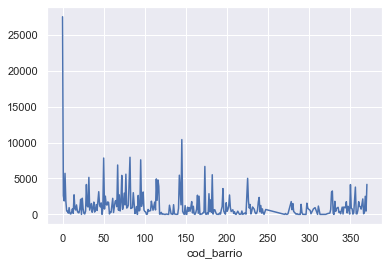

In [250]:
gb21_barrio_d.plot()

There are some popular neighborhood. But the zero value is the principal.

Well, we explore the "discapacidad" column.

In [251]:
f_sb2021['discapacidad'].unique()

array(['ninguna', 'mas de una', 'una', 0], dtype=object)

Replace de value of cero with nothing.

In [252]:
f_sb2021['discapacidad'] = f_sb2021['discapacidad'].replace(0, "ninguna")

Now, we realized the group by.

In [253]:
gb21_dc = f_sb2021.groupby("discapacidad")['discapacidad'].count()
gb21_dc

discapacidad
mas de una      9062
ninguna       339200
una             9186
Name: discapacidad, dtype: int64

More than half of the population does not have any disability, but there is a high sample of the population that does.

In [254]:
gb21_dcba = f_sb2021.groupby(["discapacidad","cod_barrio"])["discapacidad"].count()

We griup by "cod_barrio"

In [255]:
gb21_dcba['mas de una'].sort_values()

cod_barrio
336      1
27       1
192      1
296      1
366      1
      ... 
95     233
82     251
67     252
50     252
145    321
Name: discapacidad, Length: 212, dtype: int64

We will explore the type of health affiliation.

In [256]:
gb21_tf = f_sb2021.groupby("tipo_afiliado_lenco")['tipo_afiliado_lenco'].count()
gb21_tf

tipo_afiliado_lenco
0      5608
1     21109
2    166673
3         2
4    164056
Name: tipo_afiliado_lenco, dtype: int64

Most of the inhabitants of the SISBEN population are beneficiaries of the health system.

In [257]:
gb21_rl = f_sb2021.groupby("bdua_regimen_lenco")['bdua_regimen_lenco'].count()
gb21_rl

bdua_regimen_lenco
0    166673
1         2
2    190773
Name: bdua_regimen_lenco, dtype: int64

Nearly half of the population is affiliated with the subsidized health care system.

In [258]:
f_sb2021["año_nacimiento"] = f_sb2021["fec_nacimiento"].dt.to_period('y')
monthly_birth = f_sb2021.groupby(["fec_nacimiento"])["fec_nacimiento"].size()

<AxesSubplot:xlabel='fec_nacimiento'>

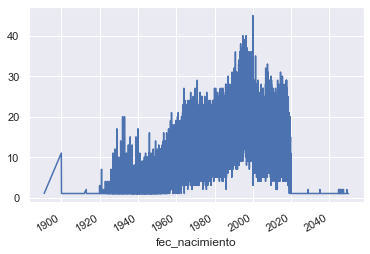

In [259]:
monthly_birth.plot()

We note that there is a large young population (between 18 and 30 years of age). Additionally, we found outliers higher than the year in which the sisben registration was carried out.

##### Sisben 2022

In [260]:
pd.set_option('display.max_columns', None)
f_sb2022.head()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3,40018082017,1,

We explore by sex.

In [261]:
gb22_sex = f_sb2022.groupby("sexo_persona")['sexo_persona'].count()
gb22_sex

sexo_persona
1    111849
2    125892
Name: sexo_persona, dtype: int64

We note that there is a decrease in the available population in the sisben, but one sex predominates.

In [262]:
gb22_cm = f_sb2022.groupby("Cod_comuna_x")['Cod_comuna_x'].count()
gb22_cm.sort_values()

Cod_comuna_x
12       77
15      448
7       771
16      784
13     1550
6      3312
9      4745
17     5991
10     9071
99     9941
3     12925
8     12995
11    13827
14    17418
5     18734
2     31515
4     33667
1     59970
Name: Cod_comuna_x, dtype: int64

Now, we explore the most popular neighborhood in the dataset.

In [263]:
gb22_tv = f_sb2022.groupby("tip_vivienda")['tip_vivienda'].count()
gb22_tv.sort_values()

tip_vivienda
4       924
3     11089
2     84637
1    141091
Name: tip_vivienda, dtype: int64

Now, we notice that the 1 house type is the most popular house type in the datase.

In [264]:
gb22_in = f_sb2022.groupby("ind_tiene_internet")['ind_tiene_internet'].count()
gb22_in.sort_values()

ind_tiene_internet
1     46833
2    190908
Name: ind_tiene_internet, dtype: int64

We now observe that there is a large part of the population that does not have access to the Internet.

In [265]:
f_sb2022["año_nacimiento"] = f_sb2021["fec_nacimiento"].dt.to_period('y')
monthly_birth = f_sb2022.groupby(["fec_nacimiento"])["fec_nacimiento"].size()

C:\Users\JEANPI~1\AppData\Local\Temp/ipykernel_8960/2719093086.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  f_sb2022["año_nacimiento"] = f_sb2021["fec_nacimiento"].dt.to_period('y')


In [266]:
monthly_birth

fec_nacimiento
1907-08-13    1
1916-08-11    1
1917-04-09    1
1917-06-08    1
1918-04-04    1
             ..
2021-12-27    1
2022-01-03    1
2022-01-07    1
2022-01-09    1
2022-01-16    1
Name: fec_nacimiento, Length: 31884, dtype: int64

We plot the groupby series

<AxesSubplot:xlabel='fec_nacimiento'>

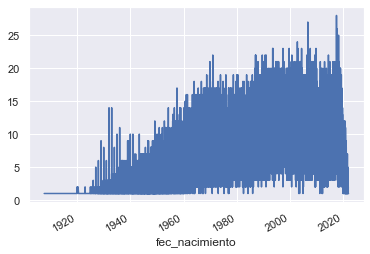

In [267]:
monthly_birth.plot()

We note that the data are better organized than the 2021 dataset. Additionally, we observe that there is a high proportion of young population.

We explore the most popular ages

In [268]:
edad = f_sb2022.groupby(["edad_calculada"])["edad_calculada"].size()

In [269]:
edad.sort_values()

edad_calculada
127       1
103       1
113       1
102       2
101       4
       ... 
19     4257
23     4264
25     4266
24     4278
0      4998
Name: edad_calculada, Length: 106, dtype: int64

We note that there are many zero values corresponding to nulls and mostly young people within the dataset.

### Maps

We covnert to .geojson format lo work in python with in.

<img src="BarriosFina.jpg">

<img src="Bucaramangabarrios.jpg">

<img src="Floridablancabarrios.jpg">

<img src="Floridablancacomuna.jpg">

<img src="Gironbarrios.jpg">

<img src="gironveredas.jpg">

<img src="piedecuestabarrios.jpg">

<img src="Todos.jpeg">

## Second assetment: EDA

### SISBEN DATASET 2022

We noticed that the 2021 SISBEN dataset has less indicators that the 2022 dataset.

In [270]:
f_sb2021.head()

,origen,cod_mpio,nom_mpio,cod_dpto,nom_dpto,id_registro,secuencia_reg,ide_ficha_origen,ide_origen,id_hogar_s3,tip_parentesco,fecha_encuesta,tip_documento,num_documento_a,sexo_persona,fec_nacimiento,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,bdua_regimen,tipo_afiliado,puntaje_sisben_3_trunc,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,discapacidad,coord_x_auto_enc,coord_y_auto_enc,direcc,cod_barrio,nom_barrio,cod_vereda,nom_vereda,tel_contacto,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_c,ind_h5,icbf_ninos_beneficiarios,icbf_madres_gestantes,icbf_ninos_venezolanos,hogar_final,estado_s3,hogar_corregido,familia,bdua_regimen_lenco,tipo_afiliado_lenco,año_nacimiento
0,sisben iv 14188777,0,0,0,0,0,0,68001093549300001017,1,0,4,2019-09-10 11:18:02,5,1,2,2013-12-27,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,"63,24",6,9,9,99,ninguna,7.106287,-73.139366,kr 4 oeste # 43 - 18 in 1,145,campo hermoso,0,sin vereda,3022550240,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,"3,75",0,0,0,0,680010935493000010171,0,680010935493000010171,1056714,2,0,2013
1,sisben iv 14028290,0,0,0,0,0,0,68001065548600002007,1,0,14,2019-10-03 10:03:35,5,2,2,2014-08-20,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,"38,18",5,9,9,99,ninguna,7.131871,-73.099892,kr 61 # 16 - 13 pi 3,114,buenos aires,0,sin vereda,3166780089,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,6,1,0,0,0,680010655486000020071,0,680010655486000020071,1043841,2,0,2014
2,sisben iv 14205420,0,0,0,0,0,0,68001047548200001063,2,0,1,2019-09-09 11:04:10,1,3,1,1929-10-15,3,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"45,08",90,3,0,99,ninguna,7.103970,-73.141461,kr 9 b oeste # 44 - 19,145,campo hermoso,0,sin vereda,6961948,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,"4,5",0,0,0,0,680010475482000010632,0,680010475482000010632,1031856,0,2,1929
3,sisben iv 14047259,0,0,0,0,0,0,68001001547500000397,1,0,1,2019-08-26 08:21:44,1,4,1,1930-02-24,4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,contributivo,cotizante,"62,04",90,3,6,99,mas de una,7.098105,-73.113694,kr 21 # 70 - 15,193,nueva granada,0,sin vereda,6474573,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,3,0,0,0,0,680010015475000003971,0,680010015475000003971,1000217,0,2,1930
4,sisben iv 14131664,0,0,0,0,0,0,68001026548300001183,2,0,1,2019-09-12 09:13:02,1,5,1,1931-09-09,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,subsidiado,cabeza de familia,"21,9",88,2,1,5,mas de una,7.112876,-73.131669,kr 7 # 43 - 56,142,alfonso lopez,0,sin vereda,6335390,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,680010265483000011832,0,680010265483000011832,1016672,2,4,1931


Text(0.5, 1.0, 'Nivel Sisben')

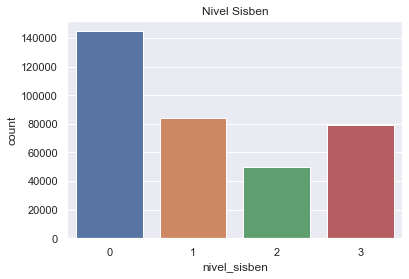

In [271]:
sns.countplot(x='nivel_sisben', data = f_sb2021)
plt.title("Nivel Sisben")

We observed that a large part of the population did not have an associated sisben level, and that strata 1 and 3 are the most present in the data set.

Text(0.5, 1.0, 'ICBF Niños Venezolanos')

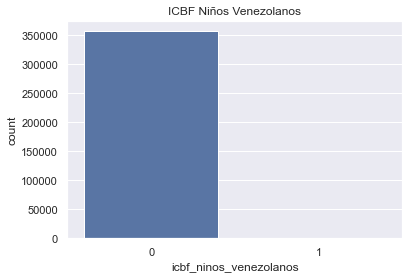

In [272]:
sns.countplot(x='icbf_ninos_venezolanos', data = f_sb2021)
plt.title("ICBF Niños Venezolanos")

There are no records of Venezuelan children assigned to the ICBF by registration.

Text(0.5, 1.0, 'ICBF Niños Beneficiarios')

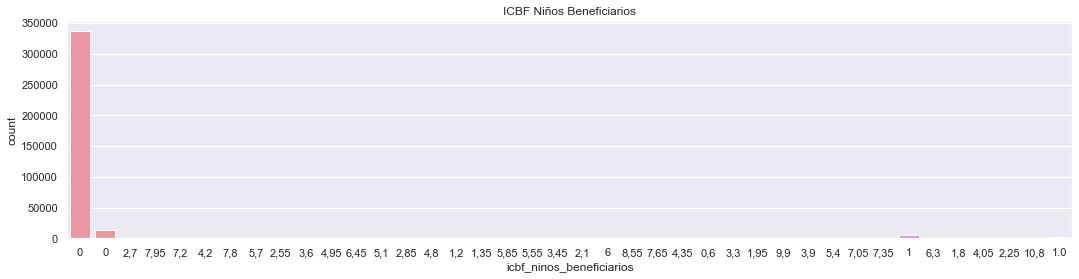

In [273]:
plt.figure(figsize=(18,4))
sns.countplot(x='icbf_ninos_beneficiarios', data = f_sb2021)
plt.title("ICBF Niños Beneficiarios")

We found values that should be normalized. Additionally outliers throughout the series.

### NOTE

**We don't have the definition or dictionary about some dataset columns (such as ind_1, ind_2, etc). We send the requierement to the entity (Alcaldia de Bucaramanga).**

### SISBEN DATASET 2021

In [274]:
f_sb2022.head()

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA,año_nacimiento
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3

Text(0.5, 0, 'Gasto ($)')

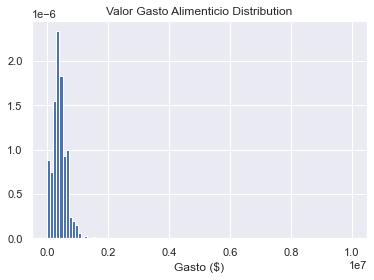

In [275]:
f_sb2022['vlr_gasto_alimento'].hist(bins=100, density=True)
plt.title("Valor Gasto Alimenticio Distribution")
plt.xlabel("Gasto ($)")

We found outliers for values in food expenditure. Even so, the largest set of values is below 0.2e7.

Text(0.5, 0, 'Gasto ($)')

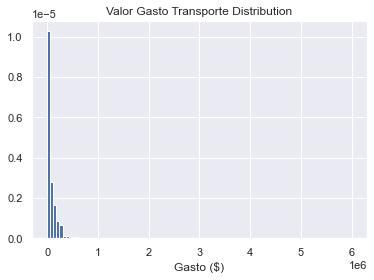

In [276]:
f_sb2022['vlr_gasto_transporte'].hist(bins=100, density=True)
plt.title("Valor Gasto Transporte Distribution")
plt.xlabel("Gasto ($)")

We note that a large part of the population does not have a high transportation expenditure value. Additionally, extreme values are found in the database.

Text(0.5, 0, 'Gasto ($)')

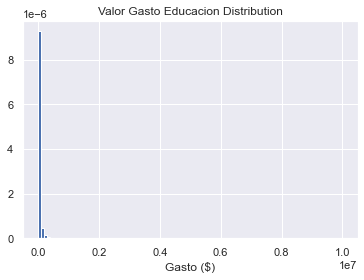

In [277]:
f_sb2022['vlr_gasto_educacion'].hist(bins=100, density=True)
plt.title("Valor Gasto Educacion Distribution")
plt.xlabel("Gasto ($)")

An interesting metric to look at is the value of education spending where we observe a spike in the value of 0.

Text(0.5, 0, 'Gasto ($)')

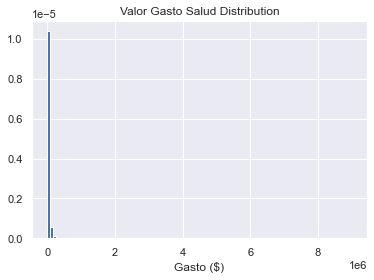

In [278]:
f_sb2022['vlr_gasto_salud'].hist(bins=100, density=True)
plt.title("Valor Gasto Salud Distribution")
plt.xlabel("Gasto ($)")

In addition, we found a health expenditure of zero.

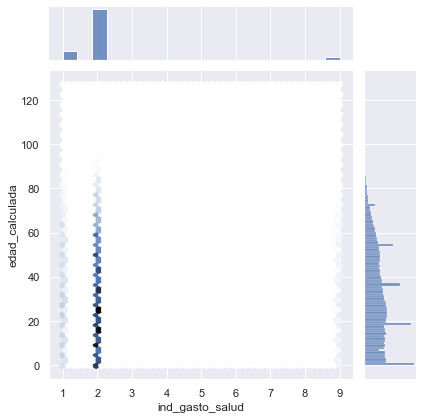

In [279]:
sns.jointplot(data=f_sb2022, x='ind_gasto_salud', y='edad_calculada', kind="hex")

Health spending by age was found to be distributed. Peaks were expected at older ages but this behavior is not observed.

Text(0.5, 1.0, 'Grupo SISBEN')

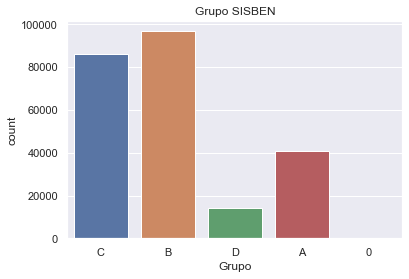

In [280]:
sns.countplot(x='Grupo', data = f_sb2022)
plt.title("Grupo SISBEN")

We found that the most predominant groups of respondents in the dataset are group B (population in moderate poverty) and group C (vulnerable population).

This result gives us a picture that explains why the values allocated to education and health expenses are really low.

In [281]:
gb22_ns = f_sb2022.groupby(["Grupo", "Nivel"], group_keys=False)['Nivel'].count().nlargest(10)
gb22_ns

Grupo  Nivel
B      3        15279
       2        14654
       5        14497
       4        13787
       1        13353
       6        12773
       7        12448
A      4        11633
       5        11586
C      1        10761
Name: Nivel, dtype: int64

We found the most predominant levels within the dataset, with the population in moderate poverty being the most predominant within the dataset, followed by the population in extreme poverty.

In [282]:
gb22_c = f_sb2022.groupby("Clasificacion", group_keys=False)['Clasificacion'].count().nlargest(10)
gb22_c

Clasificacion
B03    15279
B02    14654
B05    14497
B04    13787
B01    13353
B06    12773
B07    12448
A04    11633
A05    11586
C01    10761
Name: Clasificacion, dtype: int64

We have population groups B01 to B05 as the most predominant in the dataset. These population groups belong to the moderate poverty group with a scale of 1 to 7.

Text(0.5, 1.0, 'Habitantes por vivienda')

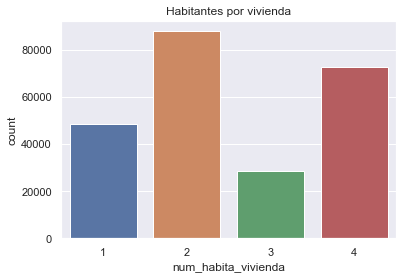

In [283]:
sns.countplot(x='num_habita_vivienda', data = f_sb2022)
plt.title("Habitantes por vivienda")

An interesting fact found is that the number of inhabitants per household is relatively low. It is between 2 and 4 inhabitants per household as the most predominant within the dataset.

Text(0.5, 1.0, 'Indicador de gasto arriendo')

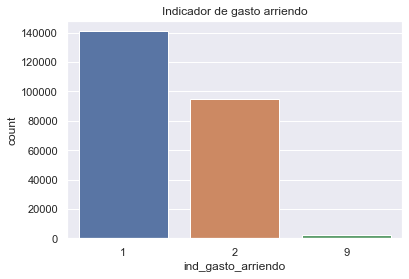

In [284]:
sns.countplot(x='ind_gasto_arriendo', data = f_sb2022)
plt.title("Indicador de gasto arriendo")

With a value of 1 = "positive rental expense", we find that the vast majority of inhabitants within the SISBEN do not own their own home.

Text(0.5, 1.0, 'Indicador de acueducto')

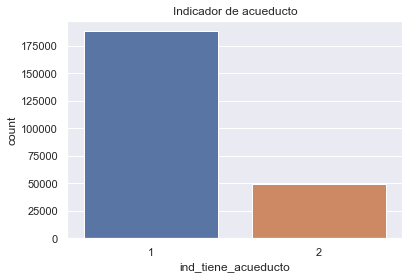

In [285]:
sns.countplot(x='ind_tiene_acueducto', data = f_sb2022)
plt.title("Indicador de acueducto")

Part of the population does not have access to water supply.

Text(0.5, 1.0, 'Indicador de alcantarillado')

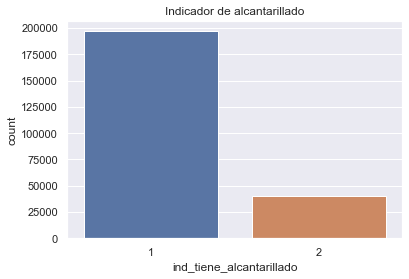

In [286]:
sns.countplot(x='ind_tiene_alcantarillado', data = f_sb2022)
plt.title("Indicador de alcantarillado")

Even the population without access to sewage.

Text(0.5, 1.0, 'Indicador de ingreso de estado')

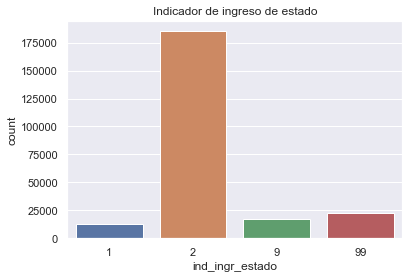

In [287]:
sns.countplot(x='ind_ingr_estado', data = f_sb2022)
plt.title("Indicador de ingreso de estado")

With value 1 = "receives income from the state" we find that a large part of the population (with indicator two) is not in state programs for subsidies.

### Statistical analysis

In [288]:
f_sb2021.describe()

,cod_mpio,cod_dpto,id_registro,tip_parentesco,tip_documento,num_documento_a,sexo_persona,maestra_grupo,nivel_sisben,fea_pers,fea_hog,cm_benef_pers,cm_benef_hog,cm_priori_pers,cm_priori_hog,jea_pers,jea_hog,iva_fea_hog_v3,iva_cm_v3,iva_cm_hog_v3,iva_fea_v3,no_cubiertos_trans_hog,gen_e_per,gen_e_hog,victima_pers,victima_hog,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,coord_x_auto_enc,coord_y_auto_enc,cod_barrio,cod_vereda,tel_contacto_2,tel_fijo,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_h5,icbf_madres_gestantes,icbf_ninos_venezolanos,estado_s3,familia,bdua_regimen_lenco,tipo_afiliado_lenco
count,357448.000000,357448.000000,3.574480e+05,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,213334.000000,213334.000000,357448.000000,357448.000000,357448.0,357448.0,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,3.574480e+05,357448.000000,357448.000000
mean,3503.845085,3.503794,4.390067e+05,2.556397,1.693734,178724.500000,1.514978,1.749200,1.176731,0.128326,0.179411,0.032545,0.071725,0.010147,0.024247,0.005721,0.020686,0.020210,0.006233,0.017278,0.004971,0.737044,0.002137,0.002294,0.125652,0.167526,31.452505,2.061301,1.832513,38.524082,7.129752,-73.129550,179.823812,10.018736,0.0,0.0,0.347536,0.057569,0.031689,0.166617,0.118848,0.003575,0.061410,0.447679,0.103117,0.022529,0.115018,0.086186,0.015669,0.026026,0.166528,0.122628,0.001723,0.000344,0.007688,1.332909e+06,1.067422,2.827502
std,15032.919593,15.032699,3.837649e+06,2.344619,1.371381,103186.493848,0.502818,1.323988,1.182537,0.334453,0.383696,0.177442,0.258033,0.100220,0.153815,0.075421,0.142330,0.140718,0.078703,0.130306,0.070332,0.440239,0.046182,0.047841,0.331457,0.373446,21.357693,2.854455,2.567013,46.812928,0.028998,0.014053,6690.266456,52.660067,0.0,0.0,0.476188,0.232927,0.175170,0.372634,0.323610,0.059687,0.240082,0.497256,0.304112,0.148397,0.319044,0.280639,0.124193,0.159213,0.372554,0.328010,0.041477,0.018547,0.764598,5.618249e+05,0.997723,1.128237
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.070567,-73.172515,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,1.000000,1.000000,89362.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,7.104343,-73.138228,50.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.024537e+06,0.000000,2.000000
50%,0.000000,0.000000,0.000000e+00,2.000000,1.000000,178724.500000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,2.000000,1.000000,5.000000,7.133427,-73.131338,107.000000,0.000000,0.0,0.0,0.000000,0.0000

We found that there are some outliers in some columns of the dataset that exceed the 0.75 quartile. This implies an additional cleaning of the data. Additionally, the data dictionary is scaled to the entity, there are some values filled in the database that have little relation with the indicator as well as the meaning of the different indicators described.

In [289]:
f_sb2022.describe()

,documento,cod_dpto,cod_mpio,num_paquete,num_ficha,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,Cod_vereda,Cod_barrio,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,res_visita1,res_visita2,ide_informante,Tip_informante,Cau_sin_firma,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,edad_calculada,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Nivel,persug,Capital,marca,estado,Linea_p,replicacion,C,Latitud,Longitud
count,237741.000000,237741.0,237741.0,237741.000000,237741.000000,237741.000000,2.377410e+05,237741.0,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.0,237741.000000,237741.000000,237741.000000,237741.0,2.377410e+05,2.377410e+05,2.377410e+05,2.377410e+05,237741.000000,237741.000000,2.377410e+05,2.377410e+05,2.377410e+05,2.377410e+05,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.000000,237741.0,237741.000000,237741.000000,237741.0,237741.0,237741.000000,237741.0

The 2022 dataset is a little more structured and cleaner than the 2021 dataset. The union of both datasets to observe the evolution will be done at the commune and neighborhood level to solve the problem posed by the entity.

In [290]:
f_sb2022.corr()

,documento,cod_dpto,cod_mpio,num_paquete,num_ficha,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,Cod_vereda,Cod_barrio,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,res_visita1,res_visita2,ide_informante,Tip_informante,Cau_sin_firma,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,edad_calculada,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Nivel,persug,Capital,marca,estado,Linea_p,replicacion,C,Latitud,Longitud
documento,1.000000,NaN,NaN,0.019542,-0.002985,-0.004572,-0.031111,NaN,-0.007013,0.011472,-0.012944,-0.015150,-0.033612,-0.007340,-0.006618,-0.001063,-0.001254,-0.001190,NaN,0.015436,0.015814,0.019211,NaN,0.023488,-0.011617,0.028349,-0.011574,-0.029421,0.000016,0.001363,0.002358,0.001357,0.002358,-0.029931,-0.000499,0.006935,-0.001190,0.002493,0.015436,NaN,-0.001541,0.021531,NaN,NaN,0.004251,0.043237,0.025776,0.032691,0.017560,0.012472,0.036942,0.056150,0.011705,0.048442,0.047485,-0.048484,0.015752,-0.001063,-0.000448,NaN,0.046602,-0.104900,-0.057396,-0.050127,-0.047453,0.036720,0.000950,0

### Possible problem approach

Within the description of the requirement of the entity, it is required to use the variables of geographic location (latitude and longitude) for the realization of an interactive dahsboard that allows understanding the current situation of each of the neighborhoods and communes of Bucaramanga.

As a work team, we want to propose a clustering model that allows grouping vulnerable sectors of the community of Bucaramanga that will allow the entity to undertake concrete actions to these population groups.

### Mockup

<img src="1_Mockup.png">